In [215]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from matplotlib import pyplot as plt
import random

# Question 1

## **Training Data**

In [281]:
train_data = torchvision.datasets.MNIST("", 
                                        train=True, 
                                        transform=torchvision.transforms.Compose([
                                            torchvision.transforms.Resize((32,32)), 
                                            torchvision.transforms.ToTensor()]),
                                        download=True)

indices = random.sample(range(60000), 6000)
train_data = torch.utils.data.Subset(train_data, indices)
trainloader = torch.utils.data.DataLoader(train_data, batch_size=10, shuffle=True)
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(len(trainloader))
print(images.shape)
print(labels.shape)


600
torch.Size([10, 1, 32, 32])
torch.Size([10])


## **Building the Network**

In [282]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # conv layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(64, 128, 3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(128, 256, 3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(256, 256, 3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(256, 512, 3, stride=1, padding=1)
        self.conv6 = nn.Conv2d(512, 512, 3, stride=1, padding=1)
        self.conv7 = nn.Conv2d(512, 512, 3, stride=1, padding=1)
        self.conv8 = nn.Conv2d(512, 512, 3, stride=1, padding=1)
        # fc layers (linear transformation)
        self.fc1 = nn.Linear(512, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, 10)
        # batch normalization layers
        self.batchnorm1 = nn.BatchNorm2d(64)
        self.batchnorm2 = nn.BatchNorm2d(128)
        self.batchnorm3 = nn.BatchNorm2d(256)
        self.batchnorm4 = nn.BatchNorm2d(256)
        self.batchnorm5 = nn.BatchNorm2d(512)
        self.batchnorm6 = nn.BatchNorm2d(512)
        self.batchnorm7 = nn.BatchNorm2d(512)
        self.batchnorm8 = nn.BatchNorm2d(512)
        # dropout layers
        self.dropout1 = nn.Dropout(p=0.5)
        self.dropout2 = nn.Dropout(p=0.5)
        

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.batchnorm1(self.conv1(x))), (2,2))
        x = F.max_pool2d(F.relu(self.batchnorm2(self.conv2(x))), (2,2))
        x = F.relu(self.batchnorm3(self.conv3(x)))
        x = F.max_pool2d(F.relu(self.batchnorm4(self.conv4(x))), (2,2))
        x = F.relu(self.batchnorm5(self.conv5(x)))
        x = F.max_pool2d(F.relu(self.batchnorm6(self.conv6(x))), (2,2))
        x = F.relu(self.batchnorm7(self.conv7(x)))
        x = F.max_pool2d(F.relu(self.batchnorm8(self.conv8(x))), (2,2))
        x = x.view(-1, self.num_flat_features(x))
        x = self.dropout1(F.relu(self.fc1(x)))
        x = self.dropout2(F.relu(self.fc2(x)))
        x = self.fc3(x)
        return x


    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
#print(net)

In [218]:
params = list(net.parameters())
print(len(params))

38


# Question 2 

## **Training the Model** 

### Optimizer and Loss Function

In [283]:
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
optimizer.zero_grad()
criterion = nn.CrossEntropyLoss()

### Training Over 5 Epochs to Get Training Loss, Training Accuracy and Test Accuracy

In [284]:
epochs = 5
train_loss_list = []
train_accuracy_list = []
test_accuracy_list = []
epochs_list = []

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        output = net(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += float(loss.item())
        #print(running_loss)
    train_loss = running_loss/len(trainloader)
    print("Epoch: " + str(e) + " Training loss: " + str(train_loss))
    train_loss_list.append(train_loss)
    
    
    # Classification of train set - For accuracy check
    correct_count, all_count = 0, 0
    for images,labels in trainloader:
        with torch.no_grad():
            logps = net(images)

        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if(true_label == pred_label):
            correct_count += 1
        all_count += 1

    accuracy = correct_count/all_count
    print("Number Of Training Images Tested =", all_count)
    print("Model Train Accuracy =", (accuracy))
    train_accuracy_list.append(accuracy)
    
    # Classification of test set - For accuracy check
    correct_count, all_count = 0, 0
    for images,labels in testloader:
        with torch.no_grad():
            logps = net(images)

        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if(true_label == pred_label):
            correct_count += 1
        all_count += 1
    accuracy = correct_count/all_count
    print("Number Of Testing Images Tested =", all_count)
    print("Model Test Accuracy =", (accuracy))
    test_accuracy_list.append(accuracy)

Epoch: 0 Training loss: 1.3013756577422222
Number Of Training Images Tested = 600
Model Train Accuracy = 0.7316666666666667
Number Of Testing Images Tested = 1000
Model Test Accuracy = 0.723
Epoch: 1 Training loss: 0.48586861170983564
Number Of Training Images Tested = 600
Model Train Accuracy = 0.9283333333333333
Number Of Testing Images Tested = 1000
Model Test Accuracy = 0.928
Epoch: 2 Training loss: 0.28821509850468524
Number Of Training Images Tested = 600
Model Train Accuracy = 0.9566666666666667
Number Of Testing Images Tested = 1000
Model Test Accuracy = 0.946
Epoch: 3 Training loss: 0.220940824839181
Number Of Training Images Tested = 600
Model Train Accuracy = 0.9716666666666667
Number Of Testing Images Tested = 1000
Model Test Accuracy = 0.964
Epoch: 4 Training loss: 0.17045644457975262
Number Of Training Images Tested = 600
Model Train Accuracy = 0.98
Number Of Testing Images Tested = 1000
Model Test Accuracy = 0.967


#### Training Loss vs Number of Epochs

Text(0.5,1,'Training Loss vs Number of Epochs')

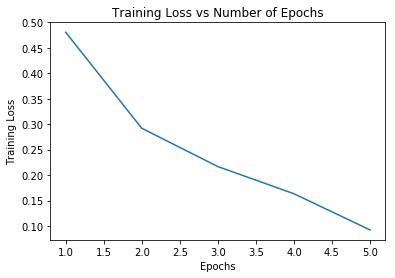

In [200]:
plt.plot(range(1,6), train_loss_list)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Number of Epochs')

#### Training Accuracy vs Number of Epochs

Text(0.5,1,'Training Accuracy vs Number of Epochs')

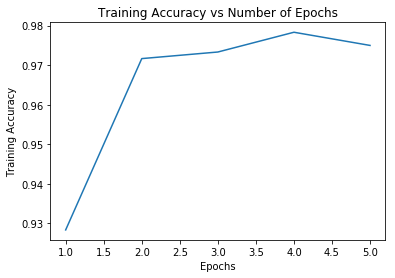

In [201]:
plt.plot(range(1,6), train_accuracy_list)
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs Number of Epochs')

#### Test Accuracy vs Number of Epochs

Text(0.5,1,'Test Accuracy vs Number of Epochs')

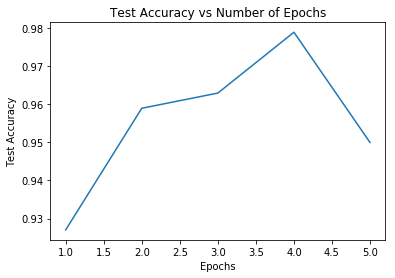

In [202]:
plt.plot(range(1,6), test_accuracy_list)
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Number of Epochs')

### **Test Data**

In [172]:
test_data = torchvision.datasets.MNIST("", 
                                        train=False, 
                                        transform=torchvision.transforms.Compose([
                                            torchvision.transforms.Resize((32,32)), 
                                            torchvision.transforms.ToTensor()]),
                                        download=True)

testloader = torch.utils.data.DataLoader(test_data, batch_size=10, shuffle=True)
dataiter = iter(testloader)
images, labels = dataiter.next()
print(len(testloader))
print(images.shape)
print(labels.shape)

1000
torch.Size([10, 1, 32, 32])
torch.Size([10])


In [186]:
epochs = 5
test_loss_list = []
epochs_list = []
print(len(testloader))
for e in range(epochs):
    running_loss = 0
    for images, labels in testloader:
        optimizer.zero_grad()
        output = net(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += float(loss.item())
    test_loss = running_loss/len(testloader)
    print("Epoch: " + str(e) + " Testing loss: " + str(test_loss))
    test_loss_list.append(test_loss)

1000
Epoch: 0 Testing loss: 0.1578187227303031
Epoch: 1 Testing loss: 0.10669285647801643
Epoch: 2 Testing loss: 0.0809367215560178
Epoch: 3 Testing loss: 0.06727546765166664
Epoch: 4 Testing loss: 0.05282761856913811


#### Test Loss vs Number of Epochs

Text(0.5,1,'Test Loss vs Number of Epochs')

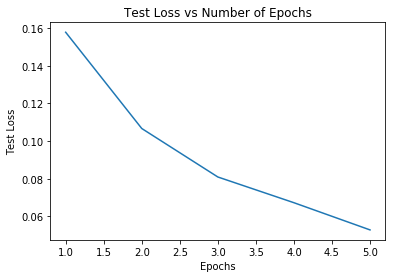

In [189]:
plt.plot(range(1,6), test_loss_list)
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title('Test Loss vs Number of Epochs')

# Question 3

### **Test Accuracy vs Type of Flip**

#### No Flip

In [235]:
test_data = torchvision.datasets.MNIST("", 
                                        train=False, 
                                        transform=torchvision.transforms.Compose([
                                            torchvision.transforms.Resize((32,32)), 
                                            torchvision.transforms.ToTensor()]),
                                        download=True)

testloader = torch.utils.data.DataLoader(test_data, batch_size=10, shuffle=True)
dataiter = iter(testloader)
images, labels = dataiter.next()
print(len(testloader))
print(images.shape)
print(labels.shape)

1000
torch.Size([10, 1, 32, 32])
torch.Size([10])


In [236]:
correct_count, all_count = 0, 0
for images,labels in testloader:
    with torch.no_grad():
        logps = net(images)

    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
        correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("Model Accuracy =", (correct_count/all_count))

Number Of Images Tested = 1000
Model Accuracy = 0.978


#### Horizontal Flip

In [237]:
horiz_flipped_test_data = torchvision.datasets.MNIST("", 
                                        train=False, 
                                        transform=torchvision.transforms.Compose([
                                            torchvision.transforms.Resize((32,32)),
                                            torchvision.transforms.RandomHorizontalFlip(p=1),
                                            torchvision.transforms.ToTensor()]),
                                        download=True)

horiz_flipped_testloader = torch.utils.data.DataLoader(horiz_flipped_test_data, batch_size=10, shuffle=True)
dataiter = iter(horiz_flipped_testloader)
images, labels = dataiter.next()
print(len(horiz_flipped_testloader))
print(images.shape)
print(labels.shape)

1000
torch.Size([10, 1, 32, 32])
torch.Size([10])


In [238]:
correct_count, all_count = 0, 0
for images,labels in horiz_flipped_testloader:
    with torch.no_grad():
        logps = net(images)

    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
        correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("Model Accuracy =", (correct_count/all_count))

Number Of Images Tested = 1000
Model Accuracy = 0.467


#### Vertical Flip

In [239]:
vert_flipped_test_data = torchvision.datasets.MNIST("", 
                                        train=False, 
                                        transform=torchvision.transforms.Compose([
                                            torchvision.transforms.Resize((32,32)),
                                            torchvision.transforms.RandomVerticalFlip(p=1),
                                            torchvision.transforms.ToTensor()]),
                                        download=True)

vert_flipped_testloader = torch.utils.data.DataLoader(vert_flipped_test_data, batch_size=10, shuffle=True)
dataiter = iter(vert_flipped_testloader)
images, labels = dataiter.next()
print(len(vert_flipped_testloader))
print(images.shape)
print(labels.shape)

1000
torch.Size([10, 1, 32, 32])
torch.Size([10])


In [240]:
correct_count, all_count = 0, 0
for images,labels in vert_flipped_testloader:
    with torch.no_grad():
        logps = net(images)

    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
        correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("Model Accuracy =", (correct_count/all_count))

Number Of Images Tested = 1000
Model Accuracy = 0.356


### Gaussian Noise

#### Variance = 0.01

In [241]:
gaussian_test_data = torchvision.datasets.MNIST("", 
                                        train=False, 
                                        transform=torchvision.transforms.Compose([
                                            torchvision.transforms.Resize((32,32)),
                                            torchvision.transforms.ToTensor(),
                                            torchvision.transforms.Lambda(lambda x : x + 0.1*torch.randn_like(x))]),
                                        download=True)

gaussian_testloader = torch.utils.data.DataLoader(gaussian_test_data, batch_size=10, shuffle=True)
dataiter = iter(gaussian_testloader)
images, labels = dataiter.next()
print(len(gaussian_testloader))
print(images.shape)
print(labels.shape)

1000
torch.Size([10, 1, 32, 32])
torch.Size([10])


In [242]:
correct_count, all_count = 0, 0
for images,labels in gaussian_testloader:
    with torch.no_grad():
        logps = net(images)

    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
        correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("Model Accuracy =", (correct_count/all_count))

Number Of Images Tested = 1000
Model Accuracy = 0.976


#### Variance = 0.1

In [231]:
import math

In [243]:
gaussian_test_data = torchvision.datasets.MNIST("", 
                                        train=False, 
                                        transform=torchvision.transforms.Compose([
                                            torchvision.transforms.Resize((32,32)),
                                            torchvision.transforms.ToTensor(),
                                            torchvision.transforms.Lambda(lambda x : x + math.sqrt(0.1)*torch.randn_like(x))]),
                                        download=True)

gaussian_testloader = torch.utils.data.DataLoader(gaussian_test_data, batch_size=10, shuffle=True)
dataiter = iter(gaussian_testloader)
images, labels = dataiter.next()
print(len(gaussian_testloader))
print(images.shape)
print(labels.shape)

1000
torch.Size([10, 1, 32, 32])
torch.Size([10])


In [244]:
correct_count, all_count = 0, 0
for images,labels in gaussian_testloader:
    with torch.no_grad():
        logps = net(images)

    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
        correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("Model Accuracy =", (correct_count/all_count))

Number Of Images Tested = 1000
Model Accuracy = 0.957


#### Variance = 1

In [245]:
gaussian_test_data = torchvision.datasets.MNIST("", 
                                        train=False, 
                                        transform=torchvision.transforms.Compose([
                                            torchvision.transforms.Resize((32,32)),
                                            torchvision.transforms.ToTensor(),
                                            torchvision.transforms.Lambda(lambda x : x + 1*torch.randn_like(x))]),
                                        download=True)

gaussian_testloader = torch.utils.data.DataLoader(gaussian_test_data, batch_size=10, shuffle=True)
dataiter = iter(gaussian_testloader)
images, labels = dataiter.next()
print(len(gaussian_testloader))
print(images.shape)
print(labels.shape)

1000
torch.Size([10, 1, 32, 32])
torch.Size([10])


In [246]:
correct_count, all_count = 0, 0
for images,labels in gaussian_testloader:
    with torch.no_grad():
        logps = net(images)

    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
        correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("Model Accuracy =", (correct_count/all_count))

Number Of Images Tested = 1000
Model Accuracy = 0.62


# Question 4

### Data Augmentation

In [274]:
t1 = torchvision.transforms.RandomHorizontalFlip(p=0.5)
t2 = torchvision.transforms.RandomVerticalFlip(p=0.5)
t3 = torchvision.transforms.RandomRotation((-360, 360))
transform_list = [t1, t2, t3]
# t = torchvision.transforms.RandomApply(transform_list, p=0.5)

In [275]:
train_data = torchvision.datasets.MNIST("", 
                                        train=True, 
                                        transform=torchvision.transforms.Compose([
                                            torchvision.transforms.Resize((32,32)),
                                            torchvision.transforms.RandomApply(transform_list, p=0.5),
                                            torchvision.transforms.ToTensor()]),
                                        download=True)

indices = random.sample(range(60000), 6000)
train_data = torch.utils.data.Subset(train_data, indices)
trainloader = torch.utils.data.DataLoader(train_data, batch_size=10, shuffle=True)
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(len(trainloader))
print(images.shape)
print(labels.shape)

600
torch.Size([10, 1, 32, 32])
torch.Size([10])


In [276]:
net2 = Net()

In [277]:
optimizer = optim.SGD(net2.parameters(), lr=0.01, momentum=0.9)
optimizer.zero_grad()
criterion = nn.CrossEntropyLoss()

### Training with Augmented Data

In [280]:
# time0 = time()
epochs = 5
train_loss_list = []
train_accuracy_list = []
test_accuracy_list = []
epochs_list = []
print(len(trainloader))
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        output = net2(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += float(loss.item())
        #print(running_loss)
    train_loss = running_loss/len(trainloader)
    print("Epoch: " + str(e) + " Training loss: " + str(train_loss))
    train_loss_list.append(train_loss)

600
Epoch: 0 Training loss: 0.8436879320442676
Epoch: 1 Training loss: 0.6860234768191973
Epoch: 2 Training loss: 0.6356791765925784
Epoch: 3 Training loss: 0.5561868172946075
Epoch: 4 Training loss: 0.48676801008948434


### Testing

In [255]:
test_data = torchvision.datasets.MNIST("", 
                                        train=False, 
                                        transform=torchvision.transforms.Compose([
                                            torchvision.transforms.Resize((32,32)), 
                                            torchvision.transforms.ToTensor()]),
                                        download=True)

testloader = torch.utils.data.DataLoader(test_data, batch_size=10, shuffle=True)
dataiter = iter(testloader)
images, labels = dataiter.next()
print(len(testloader))
print(images.shape)
print(labels.shape)

1000
torch.Size([10, 1, 32, 32])
torch.Size([10])


In [261]:
correct_count, all_count = 0, 0
for images,labels in testloader:
    with torch.no_grad():
        logps = net2(images)

    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
        correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("Model Accuracy =", (correct_count/all_count))

Number Of Images Tested = 1000
Model Accuracy = 0.883


#### Horizontal Flip

In [262]:
horiz_flipped_test_data = torchvision.datasets.MNIST("", 
                                        train=False, 
                                        transform=torchvision.transforms.Compose([
                                            torchvision.transforms.Resize((32,32)),
                                            torchvision.transforms.RandomHorizontalFlip(p=1),
                                            torchvision.transforms.ToTensor()]),
                                        download=True)

horiz_flipped_testloader = torch.utils.data.DataLoader(horiz_flipped_test_data, batch_size=10, shuffle=True)
dataiter = iter(horiz_flipped_testloader)
images, labels = dataiter.next()
print(len(horiz_flipped_testloader))
print(images.shape)
print(labels.shape)

1000
torch.Size([10, 1, 32, 32])
torch.Size([10])


In [263]:
correct_count, all_count = 0, 0
for images,labels in horiz_flipped_testloader:
    with torch.no_grad():
        logps = net2(images)

    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
        correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("Model Accuracy =", (correct_count/all_count))

Number Of Images Tested = 1000
Model Accuracy = 0.618


#### Vertical Flip

In [264]:
vert_flipped_test_data = torchvision.datasets.MNIST("", 
                                        train=False, 
                                        transform=torchvision.transforms.Compose([
                                            torchvision.transforms.Resize((32,32)),
                                            torchvision.transforms.RandomVerticalFlip(p=1),
                                            torchvision.transforms.ToTensor()]),
                                        download=True)

vert_flipped_testloader = torch.utils.data.DataLoader(vert_flipped_test_data, batch_size=10, shuffle=True)
dataiter = iter(vert_flipped_testloader)
images, labels = dataiter.next()
print(len(vert_flipped_testloader))
print(images.shape)
print(labels.shape)

1000
torch.Size([10, 1, 32, 32])
torch.Size([10])


In [265]:
correct_count, all_count = 0, 0
for images,labels in vert_flipped_testloader:
    with torch.no_grad():
        logps = net2(images)

    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
        correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("Model Accuracy =", (correct_count/all_count))

Number Of Images Tested = 1000
Model Accuracy = 0.667


#### Gaussian Noise - Variance 0.01

In [266]:
gaussian_test_data = torchvision.datasets.MNIST("", 
                                        train=False, 
                                        transform=torchvision.transforms.Compose([
                                            torchvision.transforms.Resize((32,32)),
                                            torchvision.transforms.ToTensor(),
                                            torchvision.transforms.Lambda(lambda x : x + 0.1*torch.randn_like(x))]),
                                        download=True)

gaussian_testloader = torch.utils.data.DataLoader(gaussian_test_data, batch_size=10, shuffle=True)
dataiter = iter(gaussian_testloader)
images, labels = dataiter.next()
print(len(gaussian_testloader))
print(images.shape)
print(labels.shape)

1000
torch.Size([10, 1, 32, 32])
torch.Size([10])


In [267]:
correct_count, all_count = 0, 0
for images,labels in gaussian_testloader:
    with torch.no_grad():
        logps = net2(images)

    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
        correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("Model Accuracy =", (correct_count/all_count))

Number Of Images Tested = 1000
Model Accuracy = 0.891


#### Gaussian Noise - Variance 0.1

In [268]:
gaussian_test_data = torchvision.datasets.MNIST("", 
                                        train=False, 
                                        transform=torchvision.transforms.Compose([
                                            torchvision.transforms.Resize((32,32)),
                                            torchvision.transforms.ToTensor(),
                                            torchvision.transforms.Lambda(lambda x : x + math.sqrt(0.1)*torch.randn_like(x))]),
                                        download=True)

gaussian_testloader = torch.utils.data.DataLoader(gaussian_test_data, batch_size=10, shuffle=True)
dataiter = iter(gaussian_testloader)
images, labels = dataiter.next()
print(len(gaussian_testloader))
print(images.shape)
print(labels.shape)

1000
torch.Size([10, 1, 32, 32])
torch.Size([10])


In [269]:
correct_count, all_count = 0, 0
for images,labels in gaussian_testloader:
    with torch.no_grad():
        logps = net2(images)

    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
        correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("Model Accuracy =", (correct_count/all_count))

Number Of Images Tested = 1000
Model Accuracy = 0.84


#### Gaussian Noise - Variance 1

In [270]:
gaussian_test_data = torchvision.datasets.MNIST("", 
                                        train=False, 
                                        transform=torchvision.transforms.Compose([
                                            torchvision.transforms.Resize((32,32)),
                                            torchvision.transforms.ToTensor(),
                                            torchvision.transforms.Lambda(lambda x : x + 1*torch.randn_like(x))]),
                                        download=True)

gaussian_testloader = torch.utils.data.DataLoader(gaussian_test_data, batch_size=10, shuffle=True)
dataiter = iter(gaussian_testloader)
images, labels = dataiter.next()
print(len(gaussian_testloader))
print(images.shape)
print(labels.shape)

1000
torch.Size([10, 1, 32, 32])
torch.Size([10])


In [273]:
correct_count, all_count = 0, 0
for images,labels in gaussian_testloader:
    with torch.no_grad():
        logps = net2(images)

    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
        correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("Model Accuracy =", (correct_count/all_count))

Number Of Images Tested = 1000
Model Accuracy = 0.539
